## OpenCV
# Yolo v2 적용
- Yolo : 사물인식용 딥러닝 엔진 (사물들의 위치와 크기 및 확률 제공)
- 참고자료 : https://medium.com/@franky07724_57962/exploring-opencvs-deep-learning-object-detection-library-e51fe7c82246
- 모델 다운로드 : https://pjreddie.com/darknet/yolov2/ (yolov2.cfg, yolov2.weights)

### 설치
- pip install opencv-python
- import cv2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
classes_80 = ["person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
            "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
            "toilet", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ]

### yolo 모델 불러오기

In [3]:
config = 'opencv_dnn/yolov2.cfg'
model = 'opencv_dnn/yolov2.weights'

yolo = cv2.dnn.readNetFromDarknet(config, model)

### 사물인식할 이미지 불러오기

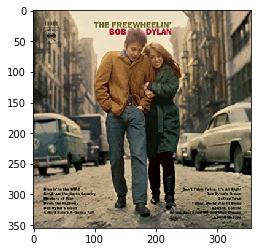

In [12]:
image = cv2.imread('bob.jpg')
plt.imshow(image[:,:,[2,1,0]])

In [13]:
image.dtype, image.max(), image.min(), image.shape

(dtype('uint8'), 255, 0, (355, 355, 3))

### blob 생성
- yolo(딥러닝 모델)의 입력용으로 "영상갯수x채널수x높이x넓이" 의 4차원 형태로 이미지 변환

In [14]:
blob = cv2.dnn.blobFromImage(image, 1.0/255.0, (416, 416), swapRB=True, crop=False)
    # 입력이미지 (image)
    # 0~255 정수값을 0~1 실수값으로 변환 (1.0/255.0)
    # yolo 의 입력이미지 규격으로 크기 변환 (416,416)
    # swapRb : true 이면 BGR 을 RGB로 변환 (yolo는 RGB를 입력받음)
    # crop : 입력 이미지의 크기를 변경한 후, 잘라내기를 실행할지의 여부

In [17]:
blob.dtype, blob.shape, blob.max(), blob.min()

(dtype('float32'), (1, 3, 416, 416), 1.0, 0.0)

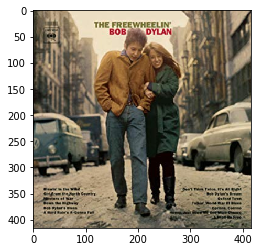

In [21]:
### yolo 입력이미지 확인
plt.imshow(np.moveaxis(blob[0],0,-1)) # 3x416x416 => 416x416x3 으로 변환

### yolo 에 이미지 설정

In [22]:
yolo.setInput(blob)

### yolo 실행

In [24]:
pred = yolo.forward()

In [26]:
pred.dtype, pred.shape

(dtype('float32'), (845, 85))

In [27]:
pred[0]

array([0.03790403, 0.05270449, 0.02783396, 0.06244877, 0.00046611,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
pred[:,4].argsort()[-1:-11:-1] # 다섯번째 칼럼이 해당 박스에 사물이 존재할 확률임

array([417, 507, 462, 512, 527, 427, 492, 471, 508, 566], dtype=int64)

In [31]:
pred[417]

array([0.40744892, 0.51150596, 0.27103668, 0.9002944 , 0.85938674,
       0.85913384, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

사물이 존재할 확률은 0.859 이고, 그 사물이 클래스0일 확률이 0.859임

In [32]:
pred[507]

array([0.83409464, 0.58356833, 0.33059487, 0.32270357, 0.8591888 ,
       0.        , 0.        , 0.80499375, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

사물이 존재할 확률은 0.859 이고, 그 사물이 클래스0일 확률이 0.804임

In [35]:
cx = pred[417,0]*355 # 원본 이미지의 폭이 355
cy = pred[417,1]*355 # 원본 이미지의 높이가 355
w = pred[417,2]*355
h = pred[417,3]*355
cx,cy,w,h

(144.64436575770378, 181.5846163034439, 96.21802300214767, 319.60452020168304)

In [36]:
left = int(cx-w/2)
right = int(cx+w/2)
top = int(cy-h/2)
bottom = int(cy+h/2)
left, right, top, bottom

(96, 192, 21, 341)

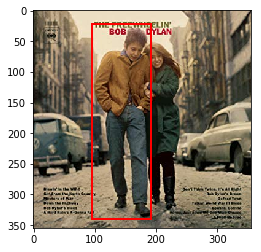

In [37]:
plt.imshow(image[:,:,[2,1,0]])
plt.gca().add_patch(
    plt.Rectangle((left, top), w, h, linewidth=2, edgecolor='r', facecolor='none'))

In [38]:
cx = pred[507,0]*355 # 원본 이미지의 폭이 355
cy = pred[507,1]*355 # 원본 이미지의 높이가 355
w = pred[507,2]*355
h = pred[507,3]*355
cx,cy,w,h

(296.10359847545624,
 207.16675877571106,
 117.36117795109749,
 114.55976739525795)

In [39]:
left = int(cx-w/2)
right = int(cx+w/2)
top = int(cy-h/2)
bottom = int(cy+h/2)
left, right, top, bottom

(237, 354, 149, 264)

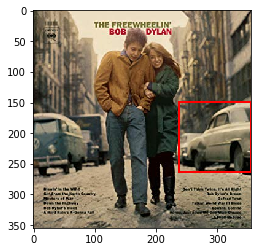

In [40]:
plt.imshow(image[:,:,[2,1,0]])
plt.gca().add_patch(
    plt.Rectangle((left, top), w, h, linewidth=2, edgecolor='r', facecolor='none'))

### 모든 사물 표시

0 person 0.7383282
0 person 0.6016616
2 car 0.56323534
2 car 0.6916416


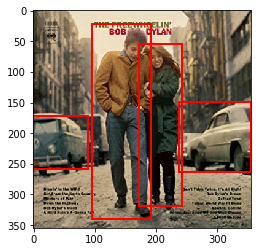

In [47]:
plt.imshow(image[:,:,[2,1,0]])

for obj in pred:
    confidence = obj[4]
    no = obj[5:].argmax()
    prob = obj[5+no]
    score = confidence*prob
    
    if score>0 : # 경계값
        print(no, classes_80[no], score)
        
        cx = obj[0]*image.shape[1]
        cy = obj[1]*image.shape[0]
        w = obj[2]*image.shape[1]
        h = obj[3]*image.shape[0]
        
        left = int(cx-w/2)
        top = int(cy-h/2)
        
        plt.gca().add_patch(
            plt.Rectangle((left, top), w, h, linewidth=2, edgecolor='r', facecolor='none'))

In [48]:
help(cv2.dnn.NMSBoxes)

Help on built-in function NMSBoxes:

NMSBoxes(...)
    NMSBoxes(bboxes, scores, score_threshold, nms_threshold[, eta[, top_k]]) -> indices
    .   @brief Performs non maximum suppression given boxes and corresponding scores.
    .   
    .   * @param bboxes a set of bounding boxes to apply NMS.
    .   * @param scores a set of corresponding confidences.
    .   * @param score_threshold a threshold used to filter boxes by score.
    .   * @param nms_threshold a threshold used in non maximum suppression.
    .   * @param indices the kept indices of bboxes after NMS.
    .   * @param eta a coefficient in adaptive threshold formula: \f$nms\_threshold_{i+1}=eta\cdot nms\_threshold_i\f$.
    .   * @param top_k if `>0`, keep at most @p top_k picked indices.

